# Import Libraries

In [2]:


# Libraries to help with reading and manipulating data
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from kaggle.api.kaggle_api_extended import KaggleApi

# libaries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# libraries for data pre-processing, model building, tuning and evaluation
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
#from sklearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
# Libraries to get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    make_scorer
)

# feature engineering
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

# nlp related libraries
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
nlp = spacy.load('en_core_web_lg')

# for data imabalance
import imblearn
from imblearn.over_sampling import SMOTE

In [3]:
# Colors used in the visualisations
colors = ['lavender','indigo']
cmap = sns.color_palette('Purples', as_cmap=True)
pal = sns.set_palette('Purples')

# Read Data

In [4]:
# Read data
api = KaggleApi()
api.authenticate()
api.dataset_download_files('saurabhshahane/fake-news-classification', unzip=True)
df = pd.read_csv('WELFake_Dataset.csv')

In [5]:
df.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


# Data Cleaning

In [6]:
df = df.drop(columns= 'Unnamed: 0')
df.head()

,title,text,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,NaN,Did they post their votes for Hillary already?,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


## Target Variable --> Fake: 1, Real: 0

In [7]:
df['label'] = 1 - df['label']

## Understand Data

In [8]:
# function that prints head, tail, duplicated index and missing values in the data
# function takes data frame name as input

def understand_data(df):
    
    # View head of the data
    print('First 5 Observations')
    print('-'*50)
    display(df.head())
    
    # View tail of the data
    print('\nLast 5 Observations')
    print('-'*50)
    display(df.tail())
    
    # Number of rows and columns
    rows, columns = df.shape
    
    # Print number of rows and columns 
    print("\nNo of rows: ", rows)
    print("No of columns: ", columns)
    
    # Information regarding the data
    print('\nInformation of Data Frame')
    print('-'*50)
    print(df.info())
    
    # Checking for missing values in the data
    print('\nNull Values')
    print('-'*25)
    print(df.isnull().sum())
    
    
    # check for blank values in the data
    print('\nBlank Values')
    print('-'*25)
    for i in df:
        print(i, ':', df[df[i] == ''].shape[0])
    
    
    # if there are blank values that are not read as NULL
    # Replace blank values with null value in dataframe
    df = df.replace({'': None})
    
    
    # if there are duplicated values in the index of data
    # means if (number or rows > number of unique values in the index)
    if rows > df.index.nunique():
        
        # number of unique values in index
        print('\nUnique Values in Index Column')
        print('-'*30)
        print(df.index.nunique())
        
        # print duplicated index values
        print('\nDuplicated Index Values')
        print('-'*30)
        print('\n')
        print(f'There are {rows - df.index.nunique()} instances of duplicate')
 
        # Username which is duplicate
        print(df[df.index.duplicated() == True].index)
    else:
        print('\n No Duplicate values in Index')
    
    
    # data frame for missing values
    miss = pd.DataFrame(data={'Missing Values': df.isna().sum()})
    
    # variable to check if there are any missing values
    if_miss = 0
    
    # iterate through all rows in the missing values data frame
    for row in miss['Missing Values']:
        # if any value in the data frame is greater than 0
        if row > 0:
            # make if_miss variable as 1
            if_miss = 1

    print('\n')
    # if if_miss variable is greater than 0 (i.e. there are missing values in data)
    if if_miss == 1:
        
        # plot missing values bar chart

        # Percentage of null value
        # Number of observations with null values divided by total number of observations
        # df.isna().sum() will add all True values i.e. the number of null values
        # df.isna().count() will count all values (both True and False) and give the total observations
        (pd.DataFrame(data={'% of Missing Values':round(df.isna().
                                                    sum()/df.isna().
                                                    count()*100,2)}).
        sort_values(by = '% of Missing Values', ascending = False).
        plot(kind = 'bar', color = 'limegreen', figsize = (15,5), legend = False)
        )

        # title, x label and y label
        plt.title('Missing Values in %age for Features', fontsize = 14)
        plt.xlabel('Features', fontsize = 12)
        plt.ylabel('Percentage', fontsize = 12)


        # show the plot
        plt.show()
        
    else:
        print('\nNo Missing Values')

First 5 Observations
--------------------------------------------------


,title,text,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,0
1,NaN,Did they post their votes for Hillary already?,0
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",0
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,1
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",0



Last 5 Observations
--------------------------------------------------


,title,text,label
72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,1
72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",0
72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,1
72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,1
72133,Goldman Sachs Endorses Hillary Clinton For Pre...,Goldman Sachs Endorses Hillary Clinton For Pre...,0



No of rows:  72134
No of columns:  3

Information of Data Frame
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   71576 non-null  object
 1   text    72095 non-null  object
 2   label   72134 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None

Null Values
-------------------------
title    558
text      39
label      0
dtype: int64

Blank Values
-------------------------
title : 0
text : 0
label : 0

 No Duplicate values in Index




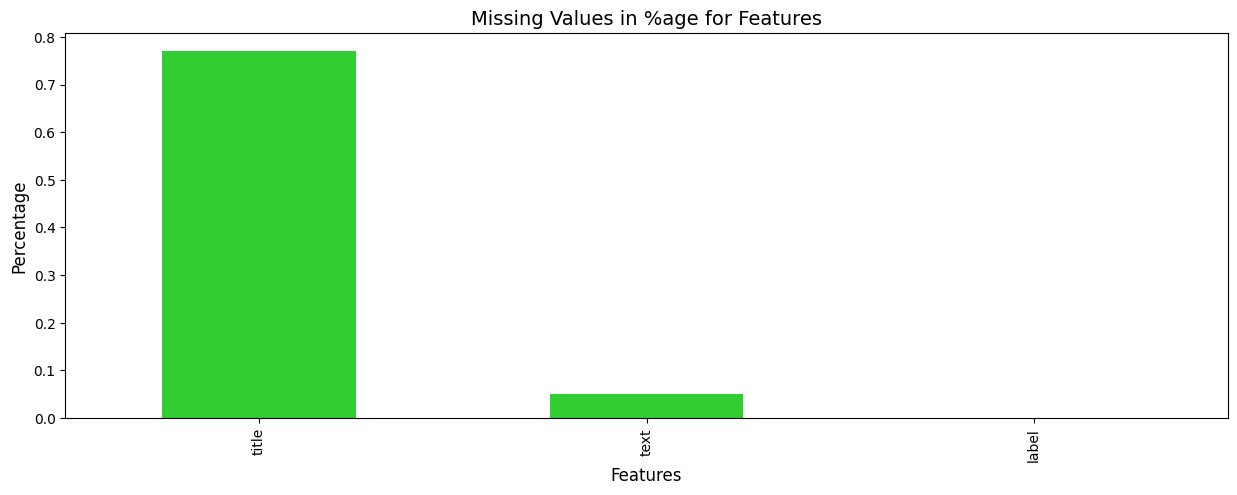

In [9]:
understand_data(df)

## Drop Null Values

In [10]:
df = df.dropna()
understand_data(df)

First 5 Observations
--------------------------------------------------


,title,text,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,0
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",0
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,1
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",0
5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,0



Last 5 Observations
--------------------------------------------------


,title,text,label
72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,1
72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",0
72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,1
72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,1
72133,Goldman Sachs Endorses Hillary Clinton For Pre...,Goldman Sachs Endorses Hillary Clinton For Pre...,0



No of rows:  71537
No of columns:  3

Information of Data Frame
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 71537 entries, 0 to 72133
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   71537 non-null  object
 1   text    71537 non-null  object
 2   label   71537 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.2+ MB
None

Null Values
-------------------------
title    0
text     0
label    0
dtype: int64

Blank Values
-------------------------
title : 0
text : 0
label : 0

 No Duplicate values in Index



No Missing Values


## Target count

In [11]:
df.label.value_counts()

label
0    36509
1    35028
Name: count, dtype: int64

# Pre-Process Data

In [12]:
df_class_0 = df[df.label == 0].sample(n = 10000, random_state = 1)
df_class_1 = df[df.label == 1].sample(n = 10000, random_state = 1)
df = pd.concat([df_class_0, df_class_1])
df.sample(n = 10)

,title,text,label
55409,Fox Guests ATTACK Each Other After Someone Ca...,Fox News host Eric Bolling had recently been f...,0
40976,Factbox: Prince Alwaleed's international and d...,DUBAI (Reuters) - Saudi Arabia embarked on an ...,1
36143,This is only the beginning: Nate Silver explai...,Donald Trump has a gift for managing news cycl...,1
18653,Trump on Twitter (August 10): Mitch McConnell,The following statements were posted to the ve...,1
60419,HAS ESPN’S “Arthur Ashe Courage Award” BECOME ...,The last three recipients of the highly covete...,0
26062,West Virginia Republicans Declare War On Poli...,In a move that shows just how little Republica...,0
59970,WATCH: President Obama HAMMERS Trump For Clai...,Donald Trump thinks African-Americans are wors...,0
40894,Spanish Mod Releases Thousands Of Pages Of Dec...,"Recently, the British Ministry of Defense gave...",0
11374,Investigation Launched After Texas Judge Wears...,A short investigation was launched after a Tra...,1
27543,Video Footage Shows Houston Man Shot By Cops ...,"At around 12:40 am on Saturday, July 9, two Ho...",0


In [13]:
df.shape

(20000, 3)

## Remove STOP WORDS and PUNCTUATION

In [14]:
# function to remove stop words and punctuation from text and lemmatize the remaining text
def remove_stop_punc(text):
    doc = nlp(text)
    
    filtered_tokens = []
    
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
   
    return " ".join(filtered_tokens) 

In [15]:
df['text_new'] = df['text'].apply(remove_stop_punc)
df = df.drop(columns = 'text')

## Get the vector representation for each news article

In [16]:
df['vector'] = df['text_new'].apply(lambda x: nlp(x).vector)

In [17]:
df.head()

,title,label,text_new,vector
43181,TRUMP OBLITERATES “Phony Vietnam Con-Artist” D...,0,President Donald Trump continue attack Conne...,"[-0.78281677, -0.047960628, -1.6251425, 1.0646..."
52432,CLUELESS IN LIBYA: CLINTON E-MAILS SHOW MORE T...,0,come see die HRCIn short Mrs. Clinton s ...,"[-0.4949707, 0.15491678, -0.8385411, 0.5548196..."
33934,Trump’s White House Team Is So Dumb They Fell...,0,people work Donald Trump s White House sharp t...,"[-0.02843275, 0.5616463, -1.4676923, -0.192501..."
15267,After Horrific National Anthem Sung At Trump ...,0,s nice criticize people se attempt sing hard s...,"[0.104631186, 1.292794, -1.1619089, 0.1932761,..."
56340,Trump Is Crushing An Int’l Tradition That Eve...,0,world talk Donald Trump doubt preen attention ...,"[-0.40536377, 1.0761969, -1.7652938, 0.1363734..."


## Train and Test Split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    df.vector.values,
    df.label,
    test_size = 0.2,
    stratify = df.label,
    random_state = 1
)

In [19]:
# convert the X_train and X_test to 2d numpy array
X_train_2d = np.stack(X_train)
X_test_2d = np.stack(X_test)

In [20]:
# apply scaling
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train_2d)
X_test = scaler.transform(X_test_2d)

In [21]:
# Checking the shape of train and test data

print("Shape of the training set: ", X_train.shape)

print("Shape of the test set: ", X_test.shape)

print("Percentage of classes in the training set:")

print(y_train.value_counts(normalize = True))

print("Percentage of classes in the test set:")

print(y_test.value_counts(normalize = True))

Shape of the training set:  (16000, 300)
Shape of the test set:  (4000, 300)
Percentage of classes in the training set:
label
1    0.5
0    0.5
Name: proportion, dtype: float64
Percentage of classes in the test set:
label
0    0.5
1    0.5
Name: proportion, dtype: float64


# Build Models

In [22]:
# Creating metric function
# Function to print the classification report and get confusion matrix in a proper format
# function will take 2 arguments: actual data, predicted data for the target variable

def metrics_score(actual, predicted):
    # print the classification report: precision, recall, f-1 score
    # Precision for a label is defined as the number of true positives divided by the number of predicted positives.
    # Recall for a label is defined as the number of true positives divided by the total number of actual positives.
    # F1 Score is the harmonic mean of precision and recall.
    print(classification_report(actual, predicted))

    # confusion matrix
    cm = confusion_matrix(actual, predicted)

    tn = cm[0,0]
    fp = cm[0,1]
    fn = cm[1,0]
    tp = cm[1,1]

    accuracy = round((tp+tn)/(tn+fp+fn+tp),2)
    fpr = round(fp/(fp+tn), 2)
    fnr = round(fn/(fn+tp), 2)
    specificity = round(tn/(tn+fp), 2)
    sensitivity = round(tp/(tp+fn), 2)
    precision = round(tp/(tp+fp), 2)
    recall = round(tp/(tp+fn), 2)
    error_rate = round(1 - accuracy, 2)
    f1 = round((2 * precision * recall) / (precision + recall), 2)


    print('True Positives = ', tp)
    print('True Negatives = ', tn)
    print('Accuracy = ', accuracy)
    print('False Positive Rate = ', fpr)
    print('False Negative Rate = ', fnr)
    print('Sensitivity (True Positive Rate)= ', sensitivity)
    print('Specificity (True Negative Rate) = ', specificity)
    print('Precision = ', precision)
    print('Recall = ', recall)
    print('F1 Score = ', f1)
    print('Error Rate = ', error_rate)


    # figure size
    plt.figure(figsize=(10,5))

    # create heatmap to show confusion matrix
    sns.heatmap(
        cm,
        annot=True,
        fmt='.2f',
        xticklabels=['Real', 'Fake'],
        yticklabels=['Real', 'Fake'],
        cmap='Purples'
    )
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    return precision, recall, f1, sensitivity, specificity

## Function to build and train the models

In [23]:

def fit_model(model):
    
    mod = model.fit(X_train, y_train)
    
    y_pred = mod.predict(X_train)
    metrics_score(y_train, y_pred)
    
    return mod

## Models to be used

In [24]:
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    XGBClassifier(),
    AdaBoostClassifier(),
    MultinomialNB()
]

## Declare lists for performance evaluation

In [25]:
precision_list = []
recall_list = []
f1_list = []
sensitivity_list = []
specificity_list = []
model_name_list = []
train_time_list = []

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.90      0.89      0.90      8000
           1       0.90      0.90      0.90      8000

    accuracy                           0.90     16000
   macro avg       0.90      0.90      0.90     16000
weighted avg       0.90      0.90      0.90     16000

True Positives =  7232
True Negatives =  7157
Accuracy =  0.9
False Positive Rate =  0.11
False Negative Rate =  0.1
Sensitivity (True Positive Rate)=  0.9
Specificity (True Negative Rate) =  0.89
Precision =  0.9
Recall =  0.9
F1 Score =  0.9
Error Rate =  0.1


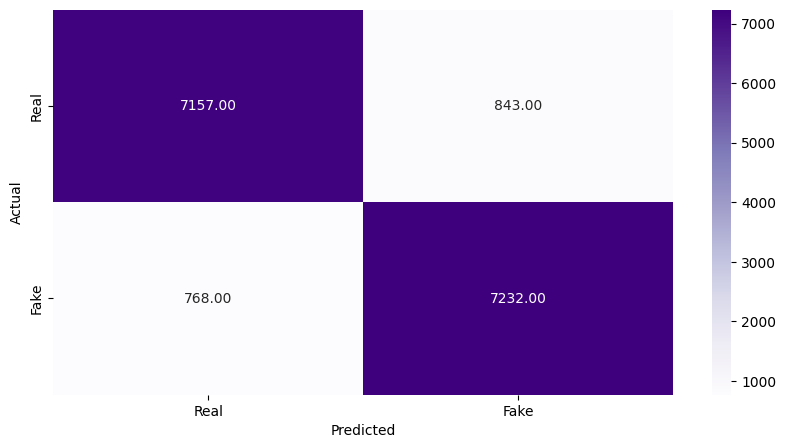

In [26]:
clf = fit_model(models[0])

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      2000
           1       0.88      0.90      0.89      2000

    accuracy                           0.89      4000
   macro avg       0.89      0.89      0.89      4000
weighted avg       0.89      0.89      0.89      4000

True Positives =  1808
True Negatives =  1757
Accuracy =  0.89
False Positive Rate =  0.12
False Negative Rate =  0.1
Sensitivity (True Positive Rate)=  0.9
Specificity (True Negative Rate) =  0.88
Precision =  0.88
Recall =  0.9
F1 Score =  0.89
Error Rate =  0.11


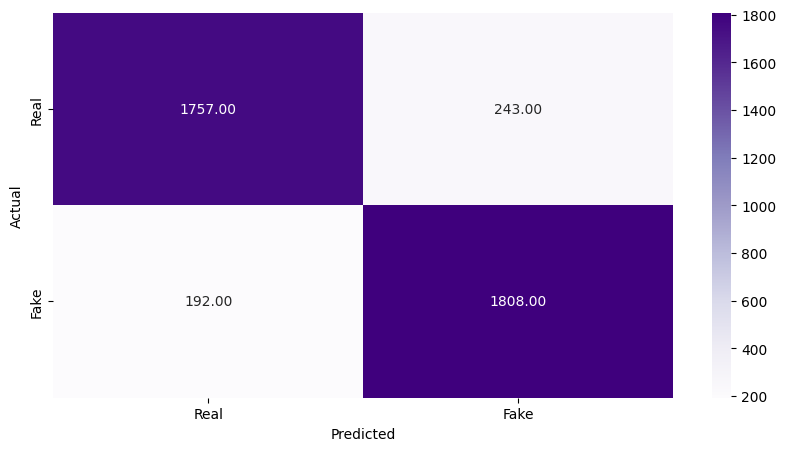

In [27]:
y_pred_test = clf.predict(X_test)
p, r, f, se, sp = metrics_score(y_test, y_pred_test)


In [28]:
precision_list.append(p)
recall_list.append(r)
f1_list.append(f)
sensitivity_list.append(se)
specificity_list.append(sp)
model_name_list.append(str(models[0]).split('(')[0])

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8000
           1       1.00      1.00      1.00      8000

    accuracy                           1.00     16000
   macro avg       1.00      1.00      1.00     16000
weighted avg       1.00      1.00      1.00     16000

True Positives =  8000
True Negatives =  8000
Accuracy =  1.0
False Positive Rate =  0.0
False Negative Rate =  0.0
Sensitivity (True Positive Rate)=  1.0
Specificity (True Negative Rate) =  1.0
Precision =  1.0
Recall =  1.0
F1 Score =  1.0
Error Rate =  0.0


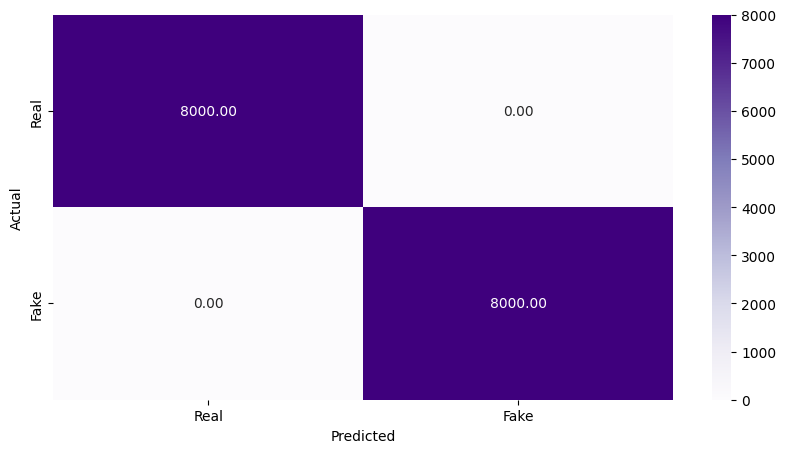

In [29]:
clf = fit_model(models[1])

              precision    recall  f1-score   support

           0       0.80      0.81      0.81      2000
           1       0.81      0.80      0.80      2000

    accuracy                           0.80      4000
   macro avg       0.80      0.80      0.80      4000
weighted avg       0.80      0.80      0.80      4000

True Positives =  1602
True Negatives =  1616
Accuracy =  0.8
False Positive Rate =  0.19
False Negative Rate =  0.2
Sensitivity (True Positive Rate)=  0.8
Specificity (True Negative Rate) =  0.81
Precision =  0.81
Recall =  0.8
F1 Score =  0.8
Error Rate =  0.2


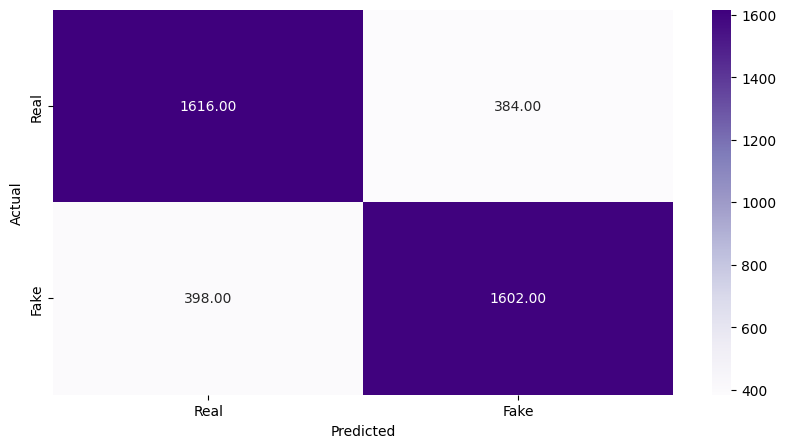

In [30]:
y_pred_test = clf.predict(X_test)
p, r, f, se, sp = metrics_score(y_test, y_pred_test)


In [31]:
precision_list.append(p)
recall_list.append(r)
f1_list.append(f)
sensitivity_list.append(se)
specificity_list.append(sp)
model_name_list.append(str(models[1]).split('(')[0])

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8000
           1       1.00      1.00      1.00      8000

    accuracy                           1.00     16000
   macro avg       1.00      1.00      1.00     16000
weighted avg       1.00      1.00      1.00     16000

True Positives =  8000
True Negatives =  8000
Accuracy =  1.0
False Positive Rate =  0.0
False Negative Rate =  0.0
Sensitivity (True Positive Rate)=  1.0
Specificity (True Negative Rate) =  1.0
Precision =  1.0
Recall =  1.0
F1 Score =  1.0
Error Rate =  0.0


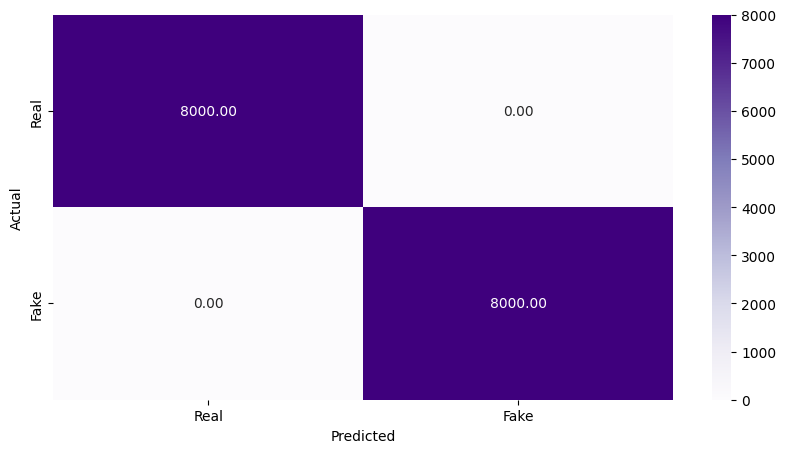

In [32]:
clf = fit_model(models[2])

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      2000
           1       0.88      0.90      0.89      2000

    accuracy                           0.89      4000
   macro avg       0.89      0.89      0.89      4000
weighted avg       0.89      0.89      0.89      4000

True Positives =  1809
True Negatives =  1758
Accuracy =  0.89
False Positive Rate =  0.12
False Negative Rate =  0.1
Sensitivity (True Positive Rate)=  0.9
Specificity (True Negative Rate) =  0.88
Precision =  0.88
Recall =  0.9
F1 Score =  0.89
Error Rate =  0.11


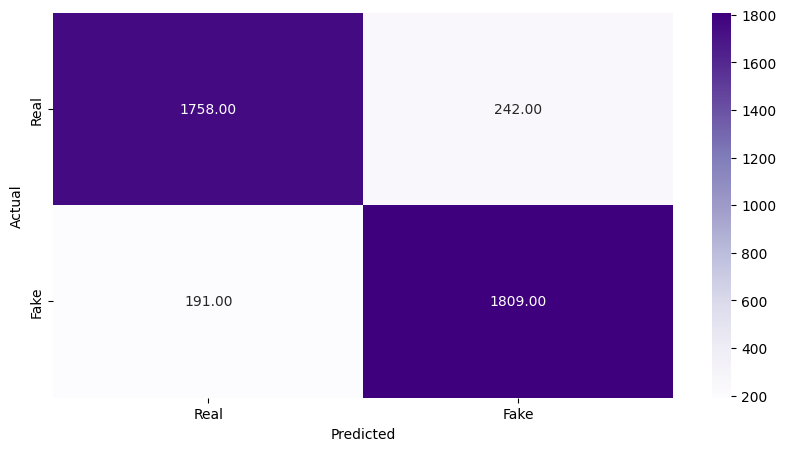

In [33]:
y_pred_test = clf.predict(X_test)
p, r, f, se, sp = metrics_score(y_test, y_pred_test)


In [34]:
precision_list.append(p)
recall_list.append(r)
f1_list.append(f)
sensitivity_list.append(se)
specificity_list.append(sp)
model_name_list.append(str(models[2]).split('(')[0])

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8000
           1       1.00      1.00      1.00      8000

    accuracy                           1.00     16000
   macro avg       1.00      1.00      1.00     16000
weighted avg       1.00      1.00      1.00     16000

True Positives =  8000
True Negatives =  8000
Accuracy =  1.0
False Positive Rate =  0.0
False Negative Rate =  0.0
Sensitivity (True Positive Rate)=  1.0
Specificity (True Negative Rate) =  1.0
Precision =  1.0
Recall =  1.0
F1 Score =  1.0
Error Rate =  0.0


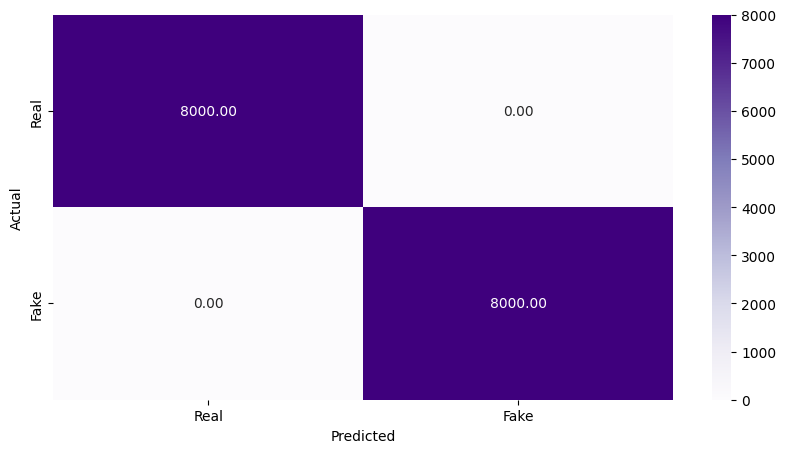

In [35]:
clf = fit_model(models[3])

              precision    recall  f1-score   support

           0       0.92      0.91      0.92      2000
           1       0.91      0.92      0.92      2000

    accuracy                           0.92      4000
   macro avg       0.92      0.92      0.92      4000
weighted avg       0.92      0.92      0.92      4000

True Positives =  1848
True Negatives =  1827
Accuracy =  0.92
False Positive Rate =  0.09
False Negative Rate =  0.08
Sensitivity (True Positive Rate)=  0.92
Specificity (True Negative Rate) =  0.91
Precision =  0.91
Recall =  0.92
F1 Score =  0.91
Error Rate =  0.08


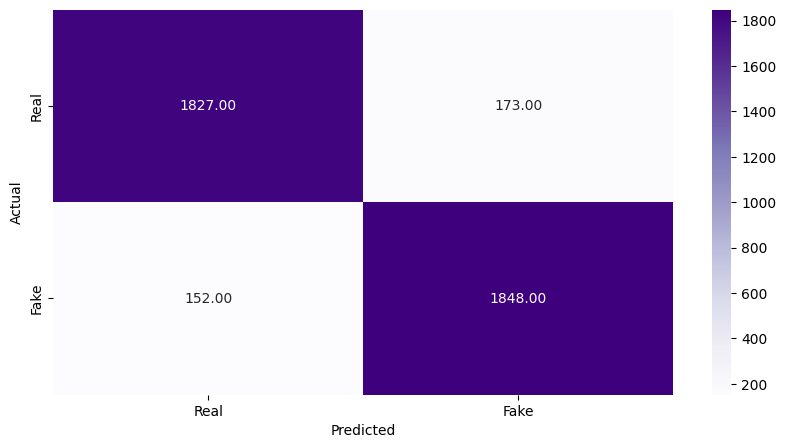

In [36]:
y_pred_test = clf.predict(X_test)
p, r, f, se, sp = metrics_score(y_test, y_pred_test)


In [37]:
precision_list.append(p)
recall_list.append(r)
f1_list.append(f)
sensitivity_list.append(se)
specificity_list.append(sp)
model_name_list.append(str(models[3]).split('(')[0])

              precision    recall  f1-score   support

           0       0.87      0.86      0.86      8000
           1       0.86      0.87      0.86      8000

    accuracy                           0.86     16000
   macro avg       0.86      0.86      0.86     16000
weighted avg       0.86      0.86      0.86     16000

True Positives =  6930
True Negatives =  6889
Accuracy =  0.86
False Positive Rate =  0.14
False Negative Rate =  0.13
Sensitivity (True Positive Rate)=  0.87
Specificity (True Negative Rate) =  0.86
Precision =  0.86
Recall =  0.87
F1 Score =  0.86
Error Rate =  0.14


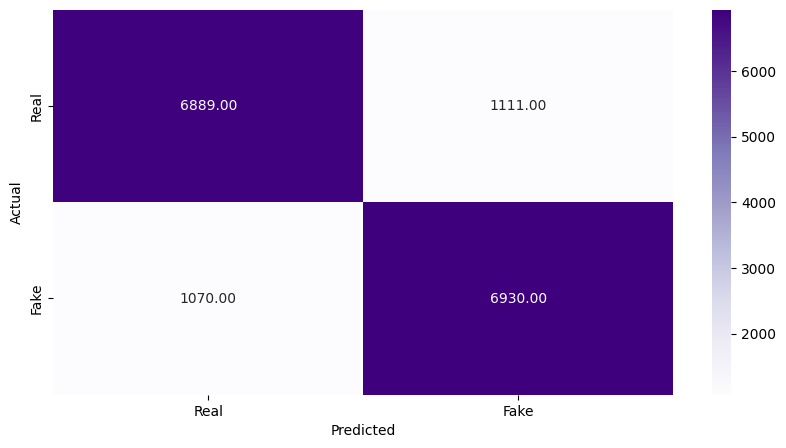

In [38]:
clf = fit_model(models[4])

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      2000
           1       0.85      0.86      0.86      2000

    accuracy                           0.85      4000
   macro avg       0.85      0.85      0.85      4000
weighted avg       0.85      0.85      0.85      4000

True Positives =  1728
True Negatives =  1688
Accuracy =  0.85
False Positive Rate =  0.16
False Negative Rate =  0.14
Sensitivity (True Positive Rate)=  0.86
Specificity (True Negative Rate) =  0.84
Precision =  0.85
Recall =  0.86
F1 Score =  0.85
Error Rate =  0.15


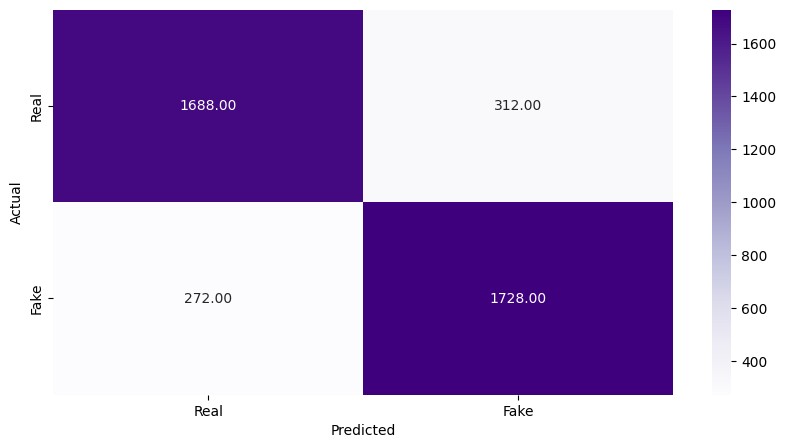

In [39]:
y_pred_test = clf.predict(X_test)
p, r, f, se, sp = metrics_score(y_test, y_pred_test)


In [40]:
precision_list.append(p)
recall_list.append(r)
f1_list.append(f)
sensitivity_list.append(se)
specificity_list.append(sp)
model_name_list.append(str(models[4]).split('(')[0])

              precision    recall  f1-score   support

           0       0.78      0.72      0.75      8000
           1       0.74      0.80      0.77      8000

    accuracy                           0.76     16000
   macro avg       0.76      0.76      0.76     16000
weighted avg       0.76      0.76      0.76     16000

True Positives =  6407
True Negatives =  5800
Accuracy =  0.76
False Positive Rate =  0.28
False Negative Rate =  0.2
Sensitivity (True Positive Rate)=  0.8
Specificity (True Negative Rate) =  0.72
Precision =  0.74
Recall =  0.8
F1 Score =  0.77
Error Rate =  0.24


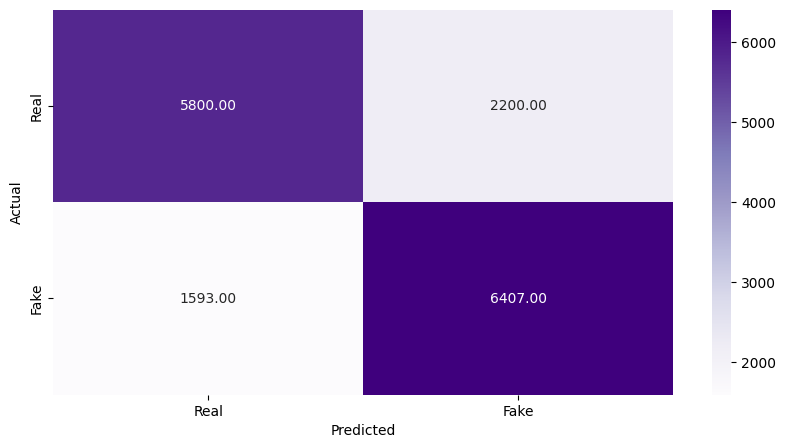

In [41]:
clf = fit_model(models[5])

              precision    recall  f1-score   support

           0       0.78      0.69      0.73      2000
           1       0.72      0.80      0.76      2000

    accuracy                           0.75      4000
   macro avg       0.75      0.75      0.75      4000
weighted avg       0.75      0.75      0.75      4000

True Positives =  1600
True Negatives =  1387
Accuracy =  0.75
False Positive Rate =  0.31
False Negative Rate =  0.2
Sensitivity (True Positive Rate)=  0.8
Specificity (True Negative Rate) =  0.69
Precision =  0.72
Recall =  0.8
F1 Score =  0.76
Error Rate =  0.25


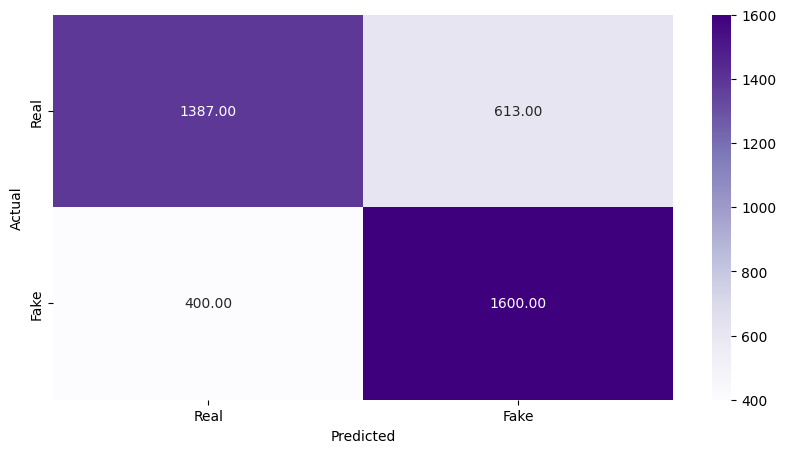

In [42]:
y_pred_test = clf.predict(X_test)
p, r, f, se, sp = metrics_score(y_test, y_pred_test)


In [43]:
precision_list.append(p)
recall_list.append(r)
f1_list.append(f)
sensitivity_list.append(se)
specificity_list.append(sp)
model_name_list.append(str(models[5]).split('(')[0])

# Models Evaluations

In [44]:
# convert the lists for the scores to a dataframe named 'per_scores'
per_scores = pd.DataFrame({
    'Model': model_name_list,
    'Recall': recall_list,
    'Precision': precision_list,
    'F1-Score': f1_list,
    'Sensitivity': sensitivity_list,
    'Specificity': specificity_list
        },
        columns = ['Model', 'Recall', 'Precision', 'F1-Score', 'Sensitivity', 'Specificity'])

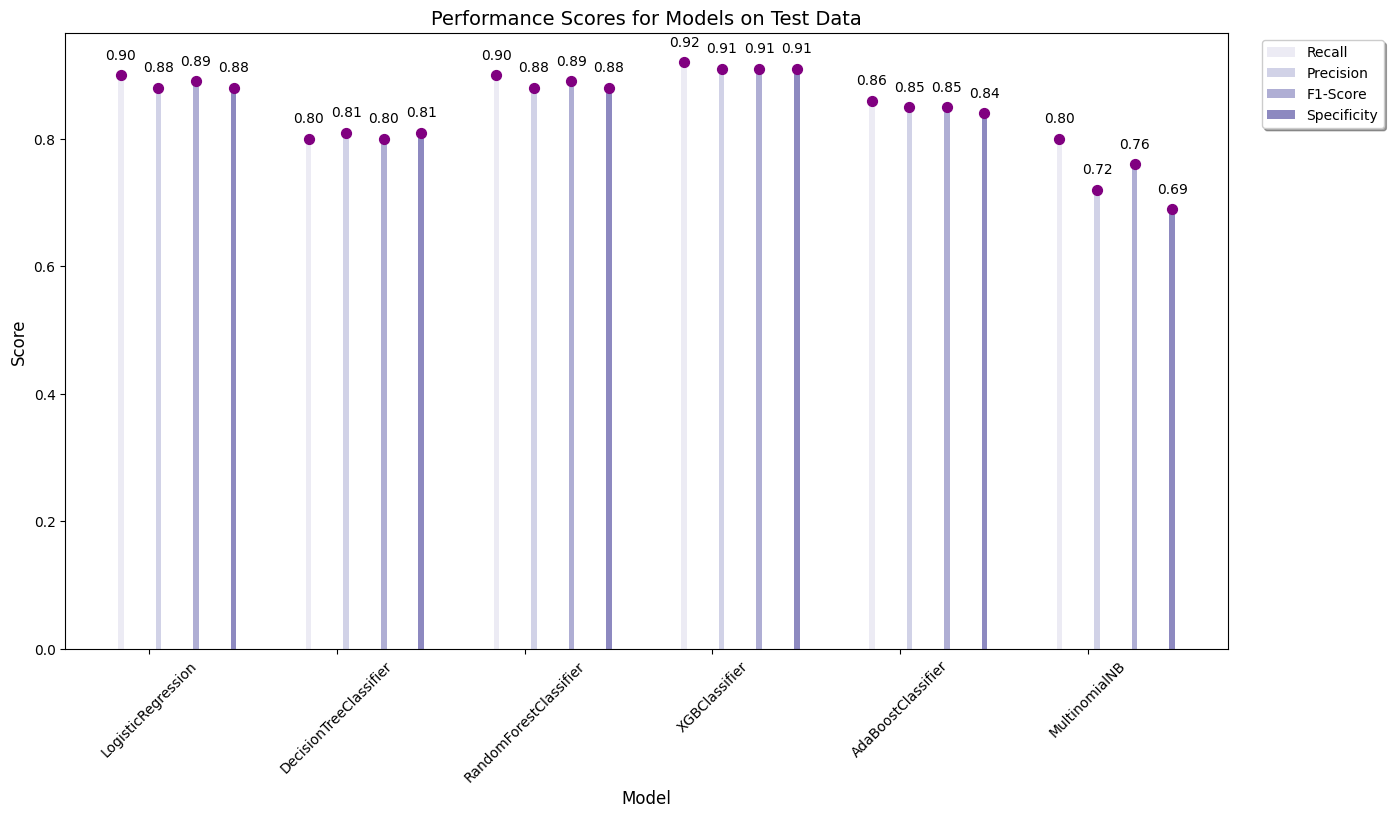

In [45]:
# plot the figure with 15 x 8 size
fig, ax = plt.subplots(figsize=(15,8))

# Create the bar plot
bars1 = ax.bar(x=np.arange(len(per_scores['Model'])), height=per_scores['Recall'], width=0.03, label='Recall')
bars2 = ax.bar(x=np.arange(len(per_scores['Model']))+0.2, height=per_scores['Precision'], width=0.03, label='Precision')
bars3 = ax.bar(x=np.arange(len(per_scores['Model']))+0.4, height=per_scores['F1-Score'], width=0.03, label='F1-Score')
bars4 = ax.bar(x=np.arange(len(per_scores['Model']))+0.6, height=per_scores['Specificity'], width=0.03, label='Specificity')

# Add a circle at the top of every bar
for bar in bars1:
    ax.scatter(bar.get_x() + bar.get_width() / 2, bar.get_height(), color='purple', s=50, zorder=2)
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() +0.02, f'{bar.get_height():.2f}', ha='center', va='bottom')
for bar in bars2:
    ax.scatter(bar.get_x() + bar.get_width() / 2, bar.get_height(), color='purple', s=50, zorder=2)
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() +0.02, f'{bar.get_height():.2f}', ha='center', va='bottom')
for bar in bars3:
    ax.scatter(bar.get_x() + bar.get_width() / 2, bar.get_height(), color='purple', s=50, zorder=2)
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() +0.02, f'{bar.get_height():.2f}', ha='center', va='bottom')
for bar in bars4:
    ax.scatter(bar.get_x() + bar.get_width() / 2, bar.get_height(), color='purple', s=50, zorder=2)
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() +0.02, f'{bar.get_height():.2f}', ha='center', va='bottom')

# set the title
plt.title('Performance Scores for Models on Test Data', fontsize = 14)

# X axis label
plt.xlabel('Model', fontsize = 12)

# Y axis label
plt.ylabel('Score', fontsize = 12)

# rotate x axis labels for better visualisation on the axis
plt.xticks(np.arange(len(per_scores['Model'])) + 0.15, per_scores['Model'], rotation=45)

ax.legend(loc='upper right', bbox_to_anchor=(1.14, 1),
          ncol=1, fancybox=True, shadow=True)

plt.show()
